In [ ]:
import pandas
import numpy as np
from google.colab import drive
import datetime
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
path = "/content/drive/MyDrive/ta/"

In [ ]:
dataset = pandas.read_csv(path+ "gabungan_data_jakarta_barat.csv", sep=";", header=0, parse_dates=True)

In [ ]:
dataset

,tanggal,harga
0,01/01/2020,9920
1,02/01/2020,9920
2,03/01/2020,9920
3,04/01/2020,9920
4,05/01/2020,9920
...,...,...
1150,24/02/2023,11100
1151,25/02/2023,11100
1152,26/02/2023,11100
1153,27/02/2023,11100


<Figure size 864x576 with 0 Axes>

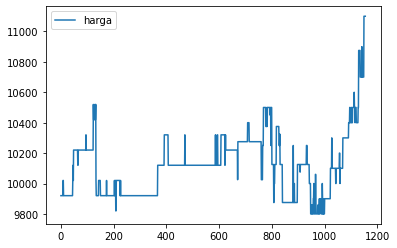

In [ ]:
plt.figure(figsize=(12, 8))
dataset.plot();

In [ ]:
# Split the dataset into train and test set
train_size = int(dataset.shape[0] * 0.80)
train_df, test_df = dataset.iloc[:train_size, :], dataset.iloc[train_size:, :]

In [ ]:
# Convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    m = len(dataset)
    X = []
    y = []
    for i in range(look_back, m):
        X.append(dataset[i - look_back: i, 0])
        y.append(dataset[i, 0])
    return np.array(X), np.array(y)

In [ ]:
look_back = 1
X_train, y_train = create_dataset(train_df.values, look_back=look_back)
X_test, y_test = create_dataset(test_df.values, look_back=look_back)

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
#percobaan unit 64 epoch 100 dan 1 hidden layer
model = Sequential()
model.add(Dense(64, input_dim=look_back, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=10, batch_size=2, verbose=2)

Epoch 1/10


UnimplementedError: ignored

In [ ]:
trainScore = model.evaluate(X_train, y_train, verbose=1)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, np.sqrt(trainScore)))
testScore = model.evaluate(X_test, y_test, verbose=1)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, np.sqrt(testScore)))

In [ ]:
# Visualize the prediction
plt.figure(figsize=(20, 10))
train_prediction = model.predict(X_train)
train_stamp = np.arange(look_back, look_back + X_train.shape[0])
test_prediction = model.predict(X_test)
test_stamp = np.arange(2 * look_back + X_train.shape[0], len(dataset))
plt.plot(dataset, label='true values')
plt.plot(train_stamp, train_prediction, label='train prediction')
plt.plot(test_stamp, test_prediction, label = 'test_prediction')
plt.legend();